# Zogy PSF and matching kernel of rectangular image PSFs

Rectangular PSFs are interesting due to window functions in general. A rectangular multiplication window function appears as a sinc convolution in frequency space.

 * Note that any realistic width square PSF is always undersampled and will be aliased in FFT, so these results here may differ from an FFT solution
 * Also these figures are for first impressions only -- the integrals are for limited ranges, otherwise we hit division by zero in the oscillating tails.

In Fourier space, same noise level, same photometric calibration, the Zogy difference image can be written as:

$$D = \frac{P_2}
{\sqrt{|P_2|^2 + |P_1}|^2}
N_1 - \frac{P_1}
{\sqrt{|P_2|^2 + |P_1|^2}} N_2
= c_1 N_1 - c_2 N_2$$


$$P_d = \sqrt{2}\frac{P_1 P_2}{\sqrt{|P_1|^2 + |P_2|^2}}$$ 

Assuming symmetric rectangular PSF-s, the Fourier transforms are all real but here not everywhere positive.

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import scipy.integrate as s_int
import numpy as np
import sympy as sp
from sympy import Heaviside

In [2]:
pi2 = np.pi * np.pi

In [3]:
x, k = sp.symbols('x k', real=True)
s1, s2 = sp.symbols('sigma1 sigma2', positive=True)

In [4]:
gPsf = 0.5/s1 * sp.Heaviside(-x+s1) * sp.Heaviside(x+s1)
display(gPsf)

0.5*Heaviside(sigma1 - x)*Heaviside(sigma1 + x)/sigma1

In [5]:
# The Fourier transform of the Gaussian PSF
ftPsf = sp.fourier_transform(gPsf, x, k)
display(ftPsf)

0.5*sin(2*pi*k*sigma1)/(pi*k*sigma1)

### $\sigma_1=1$, $\sigma_2=2$

In [6]:
# f1 : the numerical function for PSF1 in Fourier space
# r1 : the numerical function for PSF1 in real space
f1 = ftPsf.subs({s1 : 1})
r1 = gPsf.subs({s1 : 1})
display(f1)
display(r1)
f1 = sp.lambdify(k, f1)
r1 = sp.lambdify(x, r1)

0.5*sin(2*pi*k)/(pi*k)

0.5*Heaviside(1 - x)*Heaviside(x + 1)

In [7]:
f2 = ftPsf.subs({s1 : 2})
display(f2)
r2 = gPsf.subs({s1 : 2})
display(r2)
f2 = sp.lambdify(k, f2)
r2 = sp.lambdify(x, r2)

0.25*sin(4*pi*k)/(pi*k)

0.25*Heaviside(2 - x)*Heaviside(x + 2)

In [8]:
# P2/P1 and P1/P2 in Fourier
df21 = ftPsf.subs({s1 : 2}) / ftPsf.subs({s1 : 1})
display(df21)
df12 = 1/df21
display(df12)
#df21 = sp.lambdify(k, df21)
#df12 = sp.lambdify(k, df12)
df21 = None
df12 = None

0.5*sin(4*pi*k)/sin(2*pi*k)

2.0*sin(2*pi*k)/sin(4*pi*k)

## The PSFs and matching kernels in Fourier space.

Let's see the solution in Fourier space.

<IPython.core.display.Javascript object>


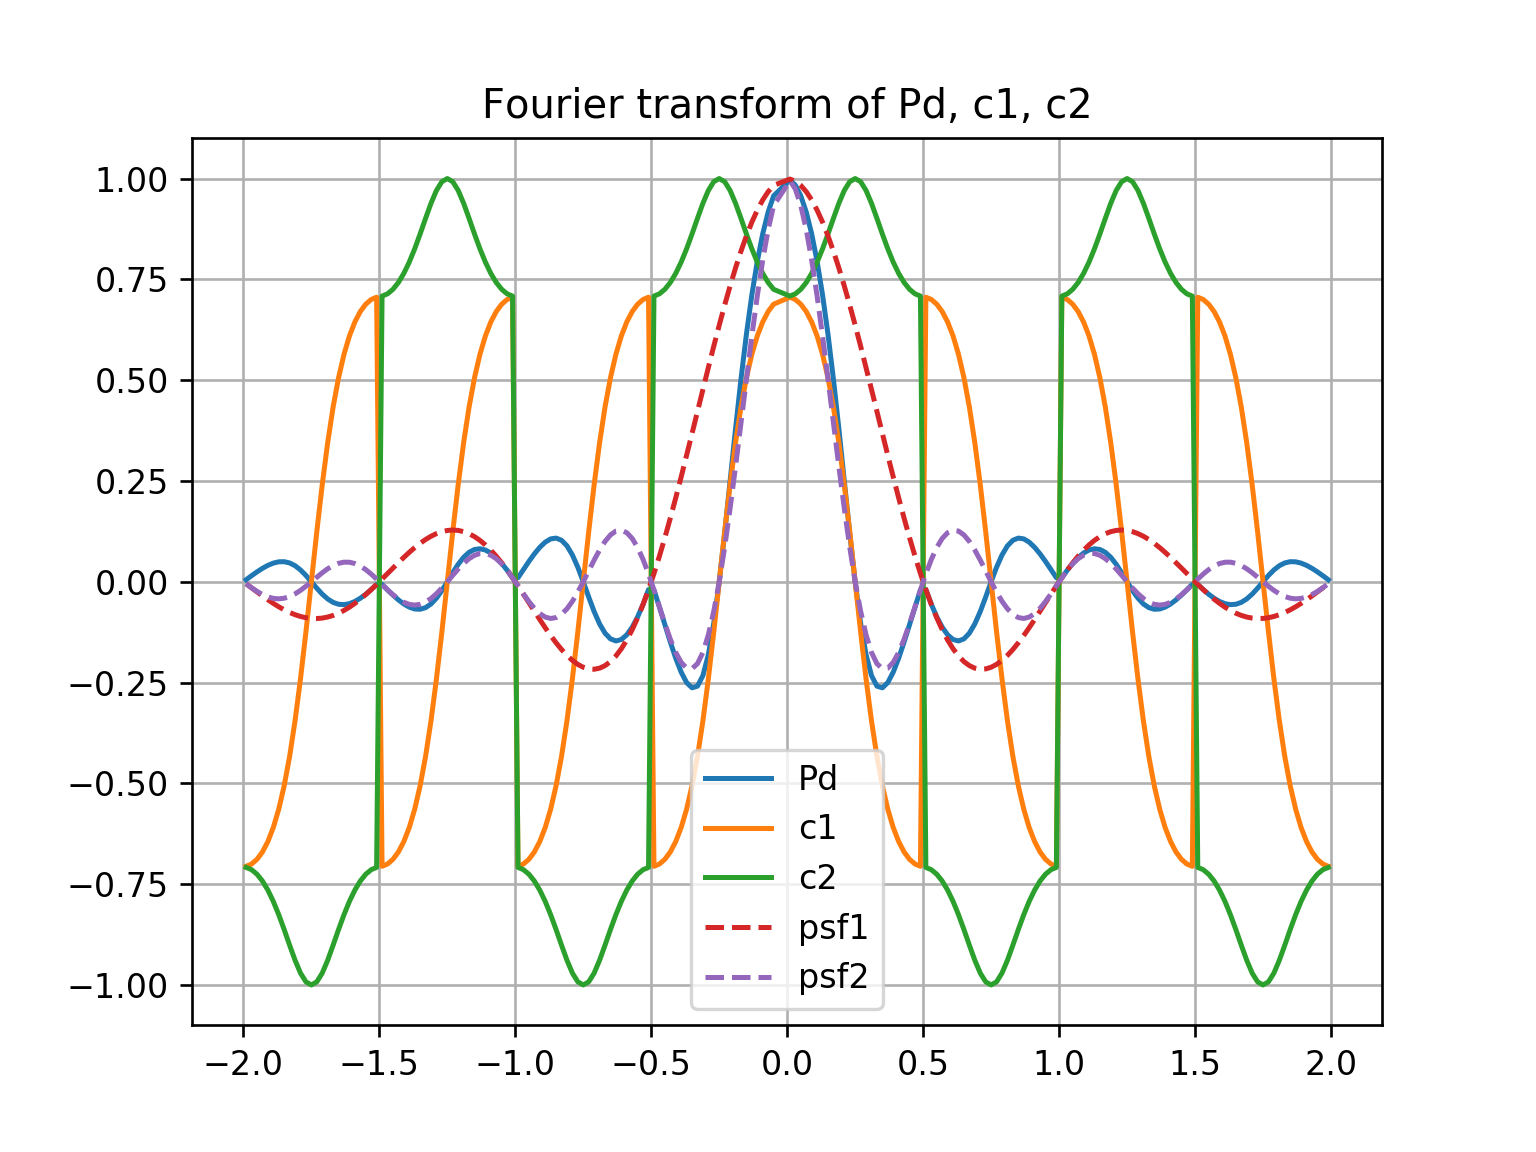

Text(0.5, 1.0, 'Fourier transform of Pd, c1, c2')

In [11]:
# Show the Fourier transformed PSFs along the x axis. All functions and values are real.
# Although a sinc function = 1 at 0, here we cannot calculate the division, avoid these points.
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
W = np.linspace(0.01, 1.99, 100)  # We need to choose values not to hit the denominator zero points
W2 = np.concatenate((-W[:1:-1],W))
ax.plot(W2, np.sqrt(2)*f1(W2)*f1(0.01)*f2(W2)*f2(0.01)/np.sqrt(f1(W2)**2 * f1(0.01)**2 + f2(W2)**2 * f2(0.01)**2), '-', label='Pd')
ax.plot(W2, f2(W2)*f2(0.01)/np.sqrt(f1(W2)**2 * f1(0.01)**2 + f2(W2)**2 * f2(0.01)**2), '-', label='c1')
ax.plot(W2, f1(W2)*f1(0.01)/np.sqrt(f1(W2)**2 * f1(0.01)**2 + f2(W2)**2 * f2(0.01)**2), '-', label='c2')
ax.plot(W2, f1(W2)*f1(0.01), '--', label='psf1')
ax.plot(W2, f2(W2)*f2(0.01), '--', label='psf2')
ax.legend()
ax.grid()
ax.set_title("Fourier transform of Pd, c1, c2")

## The PSFs and matching kernels in Image space.

Let's numerically (inverse) Fourier transform Pd

The 2D Gaussians are the product of the per-axis Gaussians here

### Pd

In [142]:
# The (inverse) Fourier-transform that we want to calculate only at k_y = 0
# The function is symmetric -> only the cosine term matters (exp(1j*x) = cos(x) + 1j*sin(x))
def f2d(y, x, k_x):
    return np.sqrt(2)*np.cos(2*np.pi*k_x*x)*f1(x)*f1(y)*f2(x)*f2(y)/np.sqrt(f1(x)**2 * f1(y)**2 + f2(x)**2 * f2(y)**2)
W = np.linspace(0.1, 4.9, 100)
#W = np.linspace(0.1, 4.9, 20)
D = []
for w in W:
    D.append(s_int.dblquad(lambda y, x:f2d(y, x, w), -2.99, 2.98, -2.99, 2.98)[0])

0.1
0.1484848484848485
0.196969696969697
0.24545454545454548
0.29393939393939394
0.34242424242424246
0.390909090909091
0.43939393939393945
0.4878787878787879
0.5363636363636364
0.584848484848485
0.6333333333333334
0.6818181818181819
0.7303030303030303
0.7787878787878789
0.8272727272727274
0.8757575757575758
0.9242424242424243
0.9727272727272728
1.0212121212121215
1.0696969696969698
1.1181818181818184
1.166666666666667
1.2151515151515153
1.263636363636364
1.3121212121212125
1.3606060606060608
1.4090909090909094
1.457575757575758
1.5060606060606063
1.554545454545455
1.6030303030303032
1.6515151515151518
1.7000000000000004
1.7484848484848488
1.7969696969696973
1.8454545454545457
1.8939393939393943
1.9424242424242428
1.9909090909090912
2.0393939393939395
2.0878787878787883
2.1363636363636367
2.184848484848485
2.233333333333334
2.281818181818182
2.3303030303030305
2.3787878787878793
2.4272727272727277
2.475757575757576
2.524242424242425
2.572727272727273
2.6212121212121215
2.669696969696970

In [143]:
# Let's have a negative side as well
W2 = np.concatenate((-W[::-1],W))
D2 = np.concatenate((D[::-1],D))

In [144]:
def Heaviside(x):
    return np.array(x>0, dtype=int)
def r1(x):
    return 0.5*Heaviside(1 - x)*Heaviside(x + 1)
def r2(x):
    return (0.25*Heaviside(2 - x)*Heaviside(x + 2))

<IPython.core.display.Javascript object>


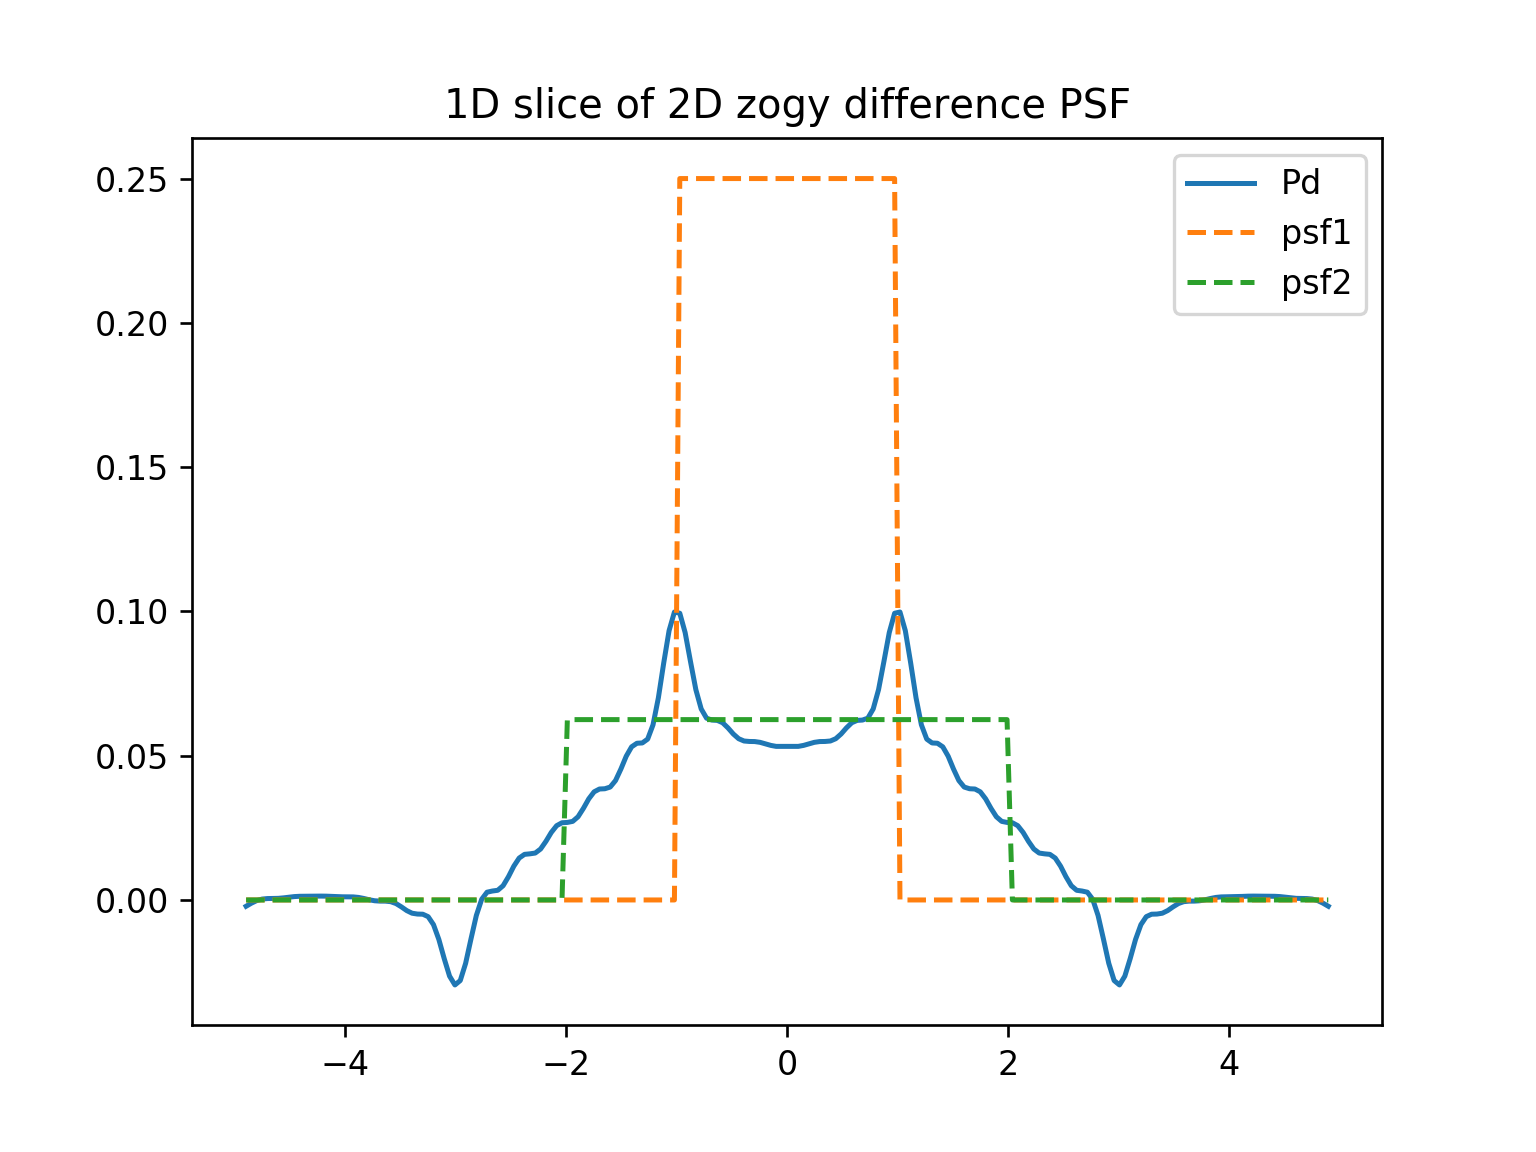

Text(0.5, 1.0, '1D slice of 2D zogy difference PSF')

In [145]:
# Show the (inverse) Fourier transformed 
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(W2, D2, '-', label='Pd')
ax.plot(W2, r1(W2)*r1(0.01), '--', label='psf1')
ax.plot(W2, r2(W2)*r2(0.01), '--', label='psf2')
ax.legend()
ax.set_title("1D slice of 2D zogy difference PSF")

---------

### c1

In [147]:
# The (inverse) Fourier-transform that we want to calculate only at k_y = 0
# The function is symmetric -> only the cosine term matters (exp(1j*x) = cos(x) + 1j*sin(x))
def c12d(y, x, k_x):
    return np.cos(2*np.pi*k_x*x)*f2(x)*f2(y)/np.sqrt(f1(x)**2 * f1(y)**2 + f2(x)**2 * f2(y)**2)
#W = np.linspace(0.1, 4.9, 20)
W = np.linspace(0.1, 4.9, 100)
D = []
for w in W:
    print(w)
    D.append(s_int.dblquad(lambda y, x:c12d(y, x, w), -2.99, 2.98, -2.99, 2.98)[0])

0.1
0.1484848484848485
0.196969696969697
0.24545454545454548
0.29393939393939394
0.34242424242424246
0.390909090909091
0.43939393939393945
0.4878787878787879
0.5363636363636364
0.584848484848485
0.6333333333333334
0.6818181818181819
0.7303030303030303
0.7787878787878789
0.8272727272727274
0.8757575757575758
0.9242424242424243
0.9727272727272728
1.0212121212121215
1.0696969696969698
1.1181818181818184
1.166666666666667
1.2151515151515153
1.263636363636364
1.3121212121212125
1.3606060606060608
1.4090909090909094
1.457575757575758
1.5060606060606063
1.554545454545455
1.6030303030303032
1.6515151515151518
1.7000000000000004
1.7484848484848488
1.7969696969696973
1.8454545454545457
1.8939393939393943
1.9424242424242428
1.9909090909090912
2.0393939393939395
2.0878787878787883
2.1363636363636367
2.184848484848485
2.233333333333334
2.281818181818182
2.3303030303030305
2.3787878787878793
2.4272727272727277
2.475757575757576
2.524242424242425
2.572727272727273
2.6212121212121215
2.669696969696970

In [148]:
# Let's have a negative side as well
W2 = np.concatenate((-W[::-1],W))
D2 = np.concatenate((D[::-1],D))

<IPython.core.display.Javascript object>


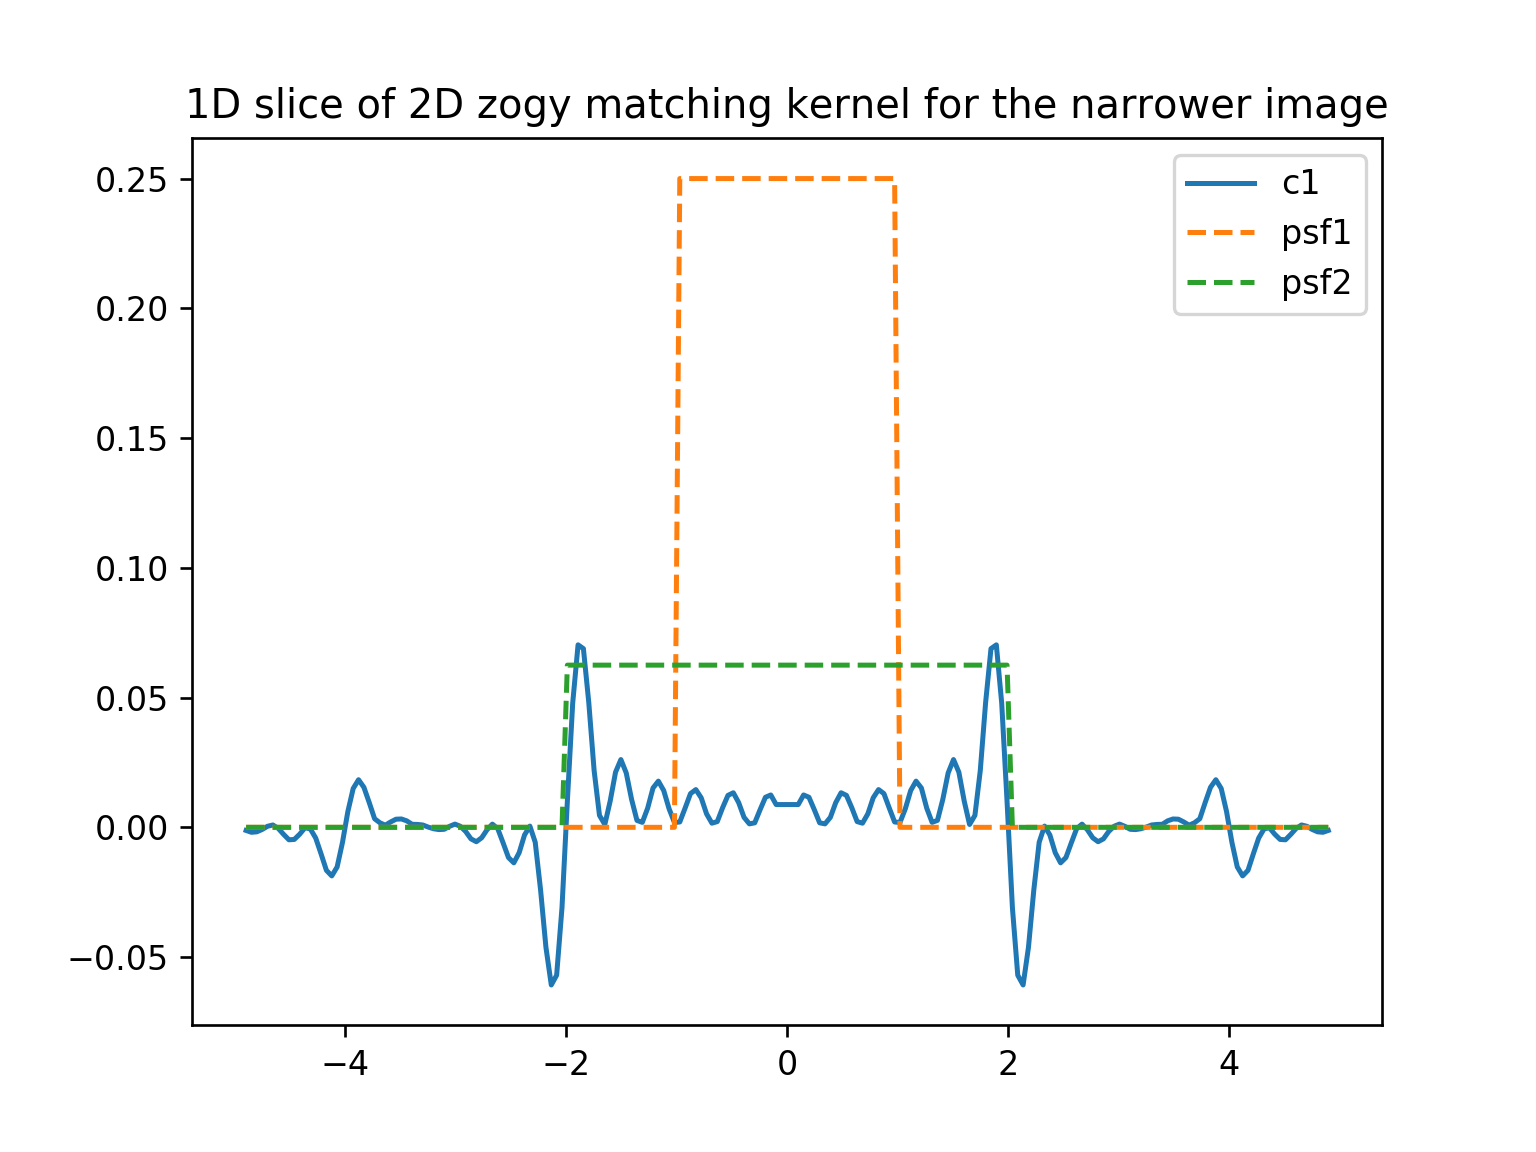

Text(0.5, 1.0, '1D slice of 2D zogy matching kernel for the narrower image')

In [149]:
# Show the (inverse) Fourier transformed 
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(W2, D2, '-', label='c1')
ax.plot(W2, r1(W2)*r1(0), '--', label='psf1')
ax.plot(W2, r2(W2)*r2(0), '--', label='psf2')
ax.legend()
ax.set_title("1D slice of 2D zogy matching kernel for the narrower image")

Zoomed-in version of this figure

<IPython.core.display.Javascript object>


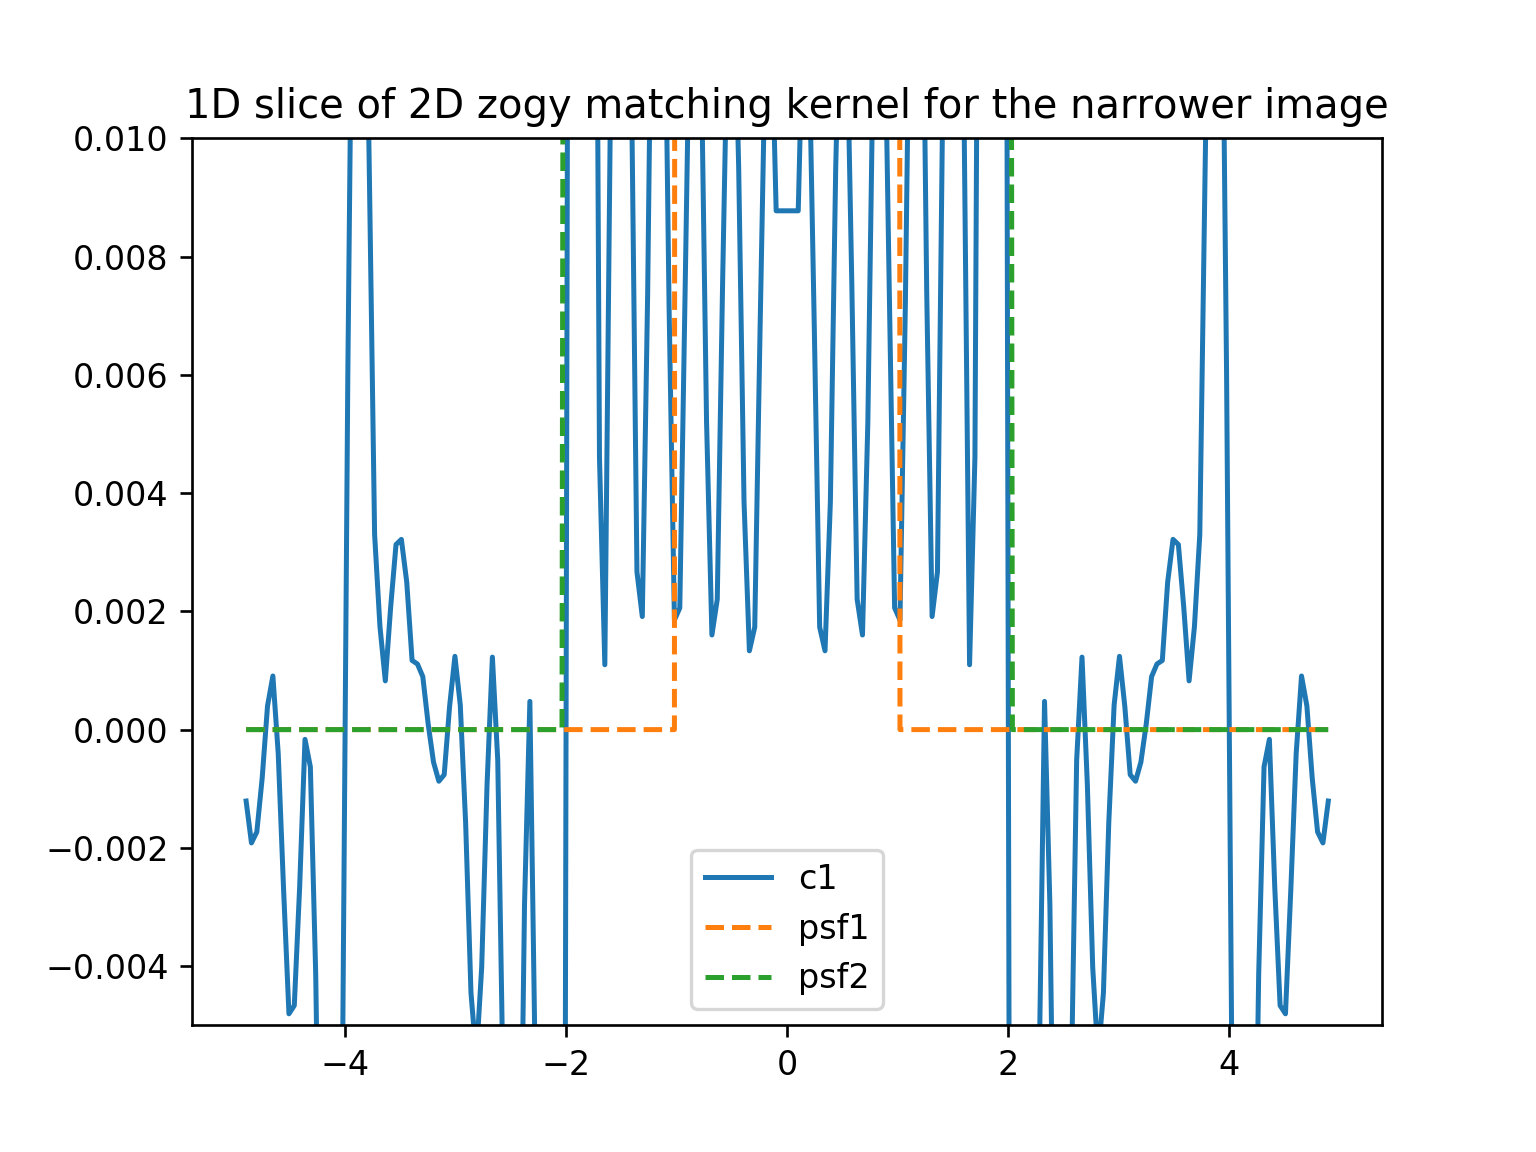

Text(0.5, 1.0, '1D slice of 2D zogy matching kernel for the narrower image')

In [150]:
# Show the (inverse) Fourier transformed 
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(W2, D2, '-', label='c1')
ax.plot(W2, r1(W2)*r1(0), '--', label='psf1')
ax.plot(W2, r2(W2)*r2(0), '--', label='psf2')
ax.legend()
ax.set_ylim(-0.005, 0.01)
ax.set_title("1D slice of 2D zogy matching kernel for the narrower image")

### c2

In [151]:
# The (inverse) Fourier-transform that we want to calculate only at k_y = 0
# The function is symmetric -> only the cosine term matters (exp(1j*x) = cos(x) + 1j*sin(x))
# The numerical integration fails at 0 where there is a dirac delta; let's subtract the dirac delta
def c21d(y, x, k_x):
    # -1 is the dirac delta
    return np.cos(2*np.pi*k_x*x)*f1(x)*f1(y)/np.sqrt(f1(x)**2 * f1(y)**2 + f2(x)**2 * f2(y)**2)
#W = np.linspace(0.1, 4.9, 20)
W = np.linspace(0.1, 4.9, 100)
D = []
for w in W:
    print(w)
    D.append(s_int.dblquad(lambda y, x:c21d(y, x, w), -2.99, 2.98, -2.99, 2.98)[0])

0.1
0.1484848484848485
0.196969696969697
0.24545454545454548
0.29393939393939394
0.34242424242424246
0.390909090909091
0.43939393939393945
0.4878787878787879
0.5363636363636364
0.584848484848485
0.6333333333333334
0.6818181818181819
0.7303030303030303
0.7787878787878789
0.8272727272727274
0.8757575757575758
0.9242424242424243
0.9727272727272728
1.0212121212121215
1.0696969696969698
1.1181818181818184
1.166666666666667
1.2151515151515153
1.263636363636364
1.3121212121212125
1.3606060606060608
1.4090909090909094
1.457575757575758
1.5060606060606063
1.554545454545455
1.6030303030303032
1.6515151515151518
1.7000000000000004
1.7484848484848488
1.7969696969696973
1.8454545454545457
1.8939393939393943
1.9424242424242428
1.9909090909090912
2.0393939393939395
2.0878787878787883
2.1363636363636367
2.184848484848485
2.233333333333334
2.281818181818182
2.3303030303030305
2.3787878787878793
2.4272727272727277
2.475757575757576
2.524242424242425
2.572727272727273
2.6212121212121215
2.669696969696970

In [152]:
# Let's have a negative side as well
W2 = np.concatenate((-W[::-1],W))
D2 = np.concatenate((D[::-1],D))

<IPython.core.display.Javascript object>


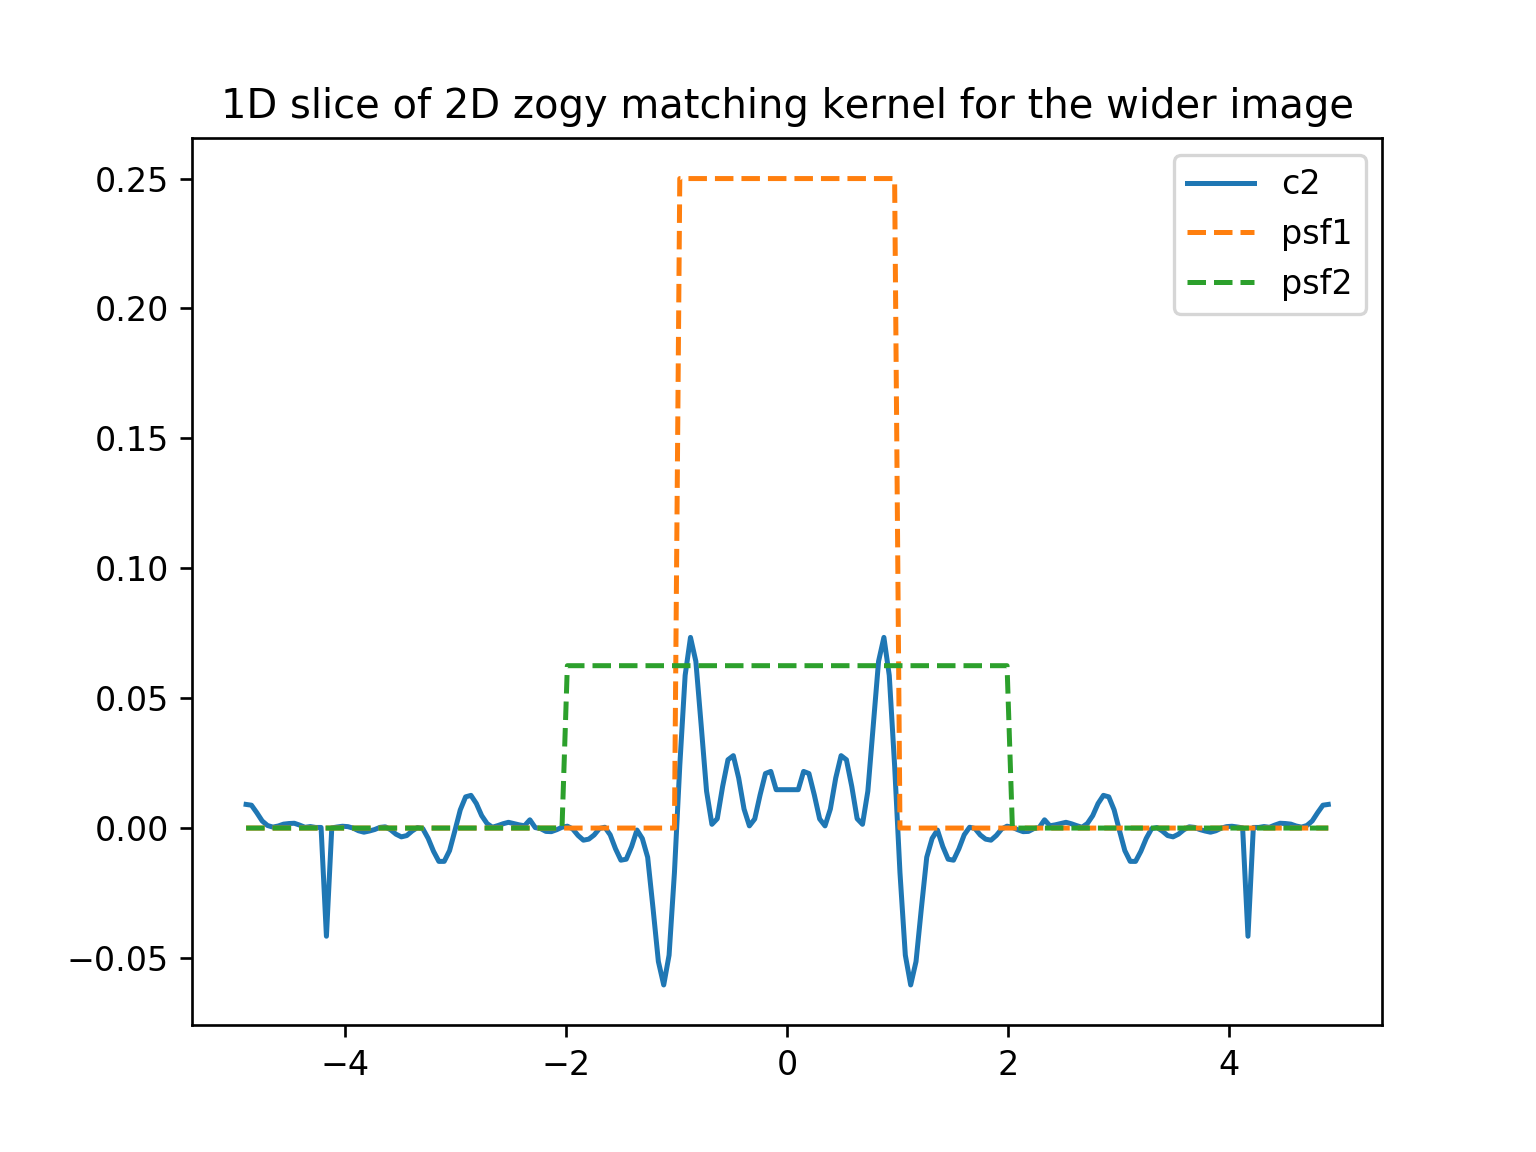

Text(0.5, 1.0, '1D slice of 2D zogy matching kernel for the wider image')

In [153]:
# Show the (inverse) Fourier transformed 
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(W2, D2, '-', label='c2')
ax.plot(W2, r1(W2)*r1(0.01), '--', label='psf1')
ax.plot(W2, r2(W2)*r2(0.01), '--', label='psf2')
ax.legend()
ax.set_title("1D slice of 2D zogy matching kernel for the wider image")